# Real-Time Test

### Import Libraries

In [13]:
import pickle
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
%store -r n_mfcc

In [14]:
GaussianNB = pickle.load(open('PickledModels/GaussianNB', 'rb'))
AdaBoostClassifier = pickle.load(open('PickledModels/AdaBoostClassifier', 'rb'))
DecisionTreeClassifier = pickle.load(open('PickledModels/DecisionTreeClassifier', 'rb'))
SVC = pickle.load(open('PickledModels/SVC', 'rb'))
PrototypePCA = pickle.load(open('PickledModels/PCA', 'rb'))

In [15]:
# Source = 'RawData/Recording1.wav'
Source = 'RawData/Recording2.wav'
# Source = 'RawData/my_voice.wav'

In [16]:
x, Fs = librosa.load(Source)

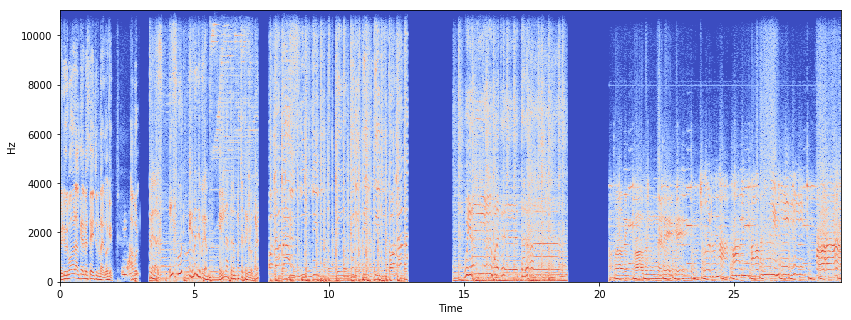

In [17]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

In [18]:
import IPython.display as ipd
import math
import numpy as np

In [19]:
ipd.Audio(x, rate = Fs)

In [20]:
import pyaudio
import wave
import time

CHUNK = 2048
wf    = wave.open(Source, 'rb')
p     = pyaudio.PyAudio()
Fs    = wf.getframerate()

In [21]:
p.get_device_count()

7

In [22]:
def StreamFeatures(stream, rate):
    MFCCS = np.mean(librosa.feature.mfcc(y=stream, sr=Fs, n_mfcc=n_mfcc).T,axis=0)
#     Mels   = np.mean(librosa.feature.melspectrogram(stream, sr=Fs).T,axis=0)
#     capturedFeatures = np.concatenate([MFCCS, Mels])
    capturedFeatures = MFCCS
    return capturedFeatures     

In [23]:
def quickPCA(rawFeatures):
    rawFeatures= rawFeatures.reshape(1, -1)
    quickPCs = PrototypePCA.transform(rawFeatures)
    return quickPCs

In [24]:
Tags = ['speech', 'music']
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=Fs,
                output=True)

data = wf.readframes(CHUNK)
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)
    rawframe = np.frombuffer(data, dtype=np.float16)
    rawframe = np.nan_to_num(rawframe)
    rawFeatures = StreamFeatures(rawframe, Fs)
    quickPCs = quickPCA(rawFeatures)
    Label1 = GaussianNB.predict(quickPCs)
    Label2 = AdaBoostClassifier.predict(quickPCs)
    Label3 = DecisionTreeClassifier.predict(quickPCs)
    Label4 = SVC.predict(quickPCs)
    print(Label1[0],Label2[0],Label3[0],Label4[0], end='\r', flush=True)
    
stream.stop_stream()
stream.close()
p.terminate() 

ValueError: There aren't any elements to reflect in axis 0 of `array`